In [ ]:
!python --version

Python 3.12.12


In [ ]:
!pip install tensorflow==2.18.0
!pip install git+https://github.com/tensorflow/addons.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.3
    Uninstalling ml_dtypes-0.5.3:
      Successfully uninstalled ml_dtypes-0.5.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is inc

In [ ]:
!pip install -U tensorflow tensorflow-addons jax jaxlib ml_dtypes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.7.2
    Uninstalling jaxlib-0.7.2:
      Successfully uninstalled jaxlib-0.7.2
  Attempting uninstall: jax
    Found existing installation: jax 0.7.2
    Uninstalling jax-0.7.2:
      Successfully un

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

print("TensorFlow version:", tf.__version__)
print("TensorFlow Addons version:", tfa.__version__)

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.8.0, so it will not be used.
  warnings.warn(


TensorFlow version: 2.20.0
TensorFlow Addons version: 0.23.0-dev


/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.20.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  # Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [01:33<00:00, 18.3MB/s]
100% 2.29G/2.29G [01:33<00:00, 26.5MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/chest-xray-pneumonia.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random

In [ ]:
healthy = [
    r'/content/chest_xray/chest_xray/test/NORMAL',
    r'/content/chest_xray/chest_xray/train/NORMAL',
]

pneumonia = [
    r'/content/chest_xray/chest_xray/test/PNEUMONIA',
    r'/content/chest_xray/chest_xray/train/PNEUMONIA',
]

In [ ]:
# Fonction pour charger les chemins des fichiers et les étiquettes
def load_data(paths, label):
    filepaths = []
    labels = []
    for path in paths:
        for file in os.listdir(path):
            filepaths.append(os.path.join(path, file))
            labels.append(label)
    return filepaths, labels

# Charger les données
healthy_files, healthy_labels = load_data(healthy, 0)  # 0 pour "Normal"
pneumonia_files, pneumonia_labels = load_data(pneumonia, 1)  # 1 pour "Pneumonia"

# Combiner les données
filepaths = healthy_files + pneumonia_files
labels = healthy_labels + pneumonia_labels

Before balancing: Healthy=1341, Pneumonia=3875
Augmenting 2534 new Healthy images...
After balancing: Healthy=3551, Pneumonia=3875


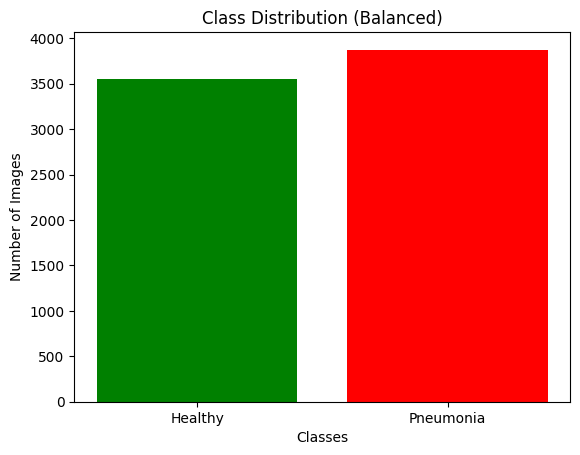

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random

# Paths
healthy_dir = "chest_xray/train/NORMAL"
pneumonia_dir = "chest_xray/train/PNEUMONIA"

# Get file lists
healthy_files = os.listdir(healthy_dir)
pneumonia_files = os.listdir(pneumonia_dir)

healthy_count = len(healthy_files)
pneumonia_count = len(pneumonia_files)

print(f"Before balancing: Healthy={healthy_count}, Pneumonia={pneumonia_count}")

# === Data Augmentation Setup ===
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Calculate how many new images we need
needed = pneumonia_count - healthy_count

if needed > 0:
    print(f"Augmenting {needed} new Healthy images...")
    i = 0
    while i < needed:
        img_file = random.choice(healthy_files)
        img_path = os.path.join(healthy_dir, img_file)

        # Load and convert to array
        img = load_img(img_path, target_size=(150,150))  # resize if needed
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Generate augmented images
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=healthy_dir,
                                  save_prefix='aug',
                                  save_format='jpeg'):
            i += 1
            if i >= needed:
                break

# Recalculate counts AFTER balancing
healthy_files = os.listdir(healthy_dir)
pneumonia_files = os.listdir(pneumonia_dir)

healthy_count = len(healthy_files)
pneumonia_count = len(pneumonia_files)

print(f"After balancing: Healthy={healthy_count}, Pneumonia={pneumonia_count}")

# === Histogram ===
import matplotlib.pyplot as plt

plt.bar(['Healthy', 'Pneumonia'], [healthy_count, pneumonia_count], color=['green', 'red'])
plt.title('Class Distribution (Balanced)')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import os
from sklearn.model_selection import train_test_split

# Rebuild filepaths + numeric labels after balancing
healthy_files = [os.path.join(healthy_dir, f) for f in os.listdir(healthy_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir)]

filepaths = healthy_files + pneumonia_files
labels = [0] * len(healthy_files) + [1] * len(pneumonia_files)   # 0=Healthy, 1=Pneumonia

print(f"Total images after balancing: {len(filepaths)}")
print(f"Healthy={len(healthy_files)}, Pneumonia={len(pneumonia_files)}")

# Now split, stratified to keep balance
train_files, test_files, train_labels, test_labels = train_test_split(
    filepaths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set: {len(train_files)}")
print(f"Test set: {len(test_files)}")


Total images after balancing: 7426
Healthy=3551, Pneumonia=3875
Training set: 5940
Test set: 1486


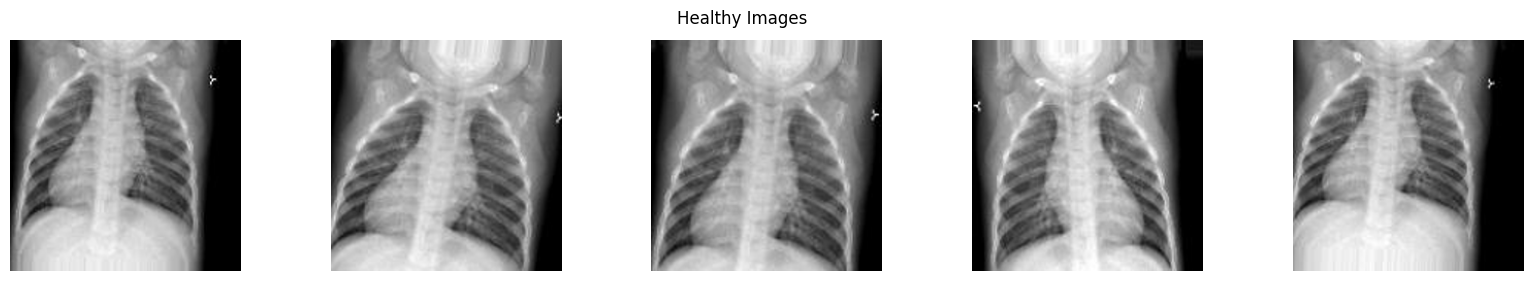

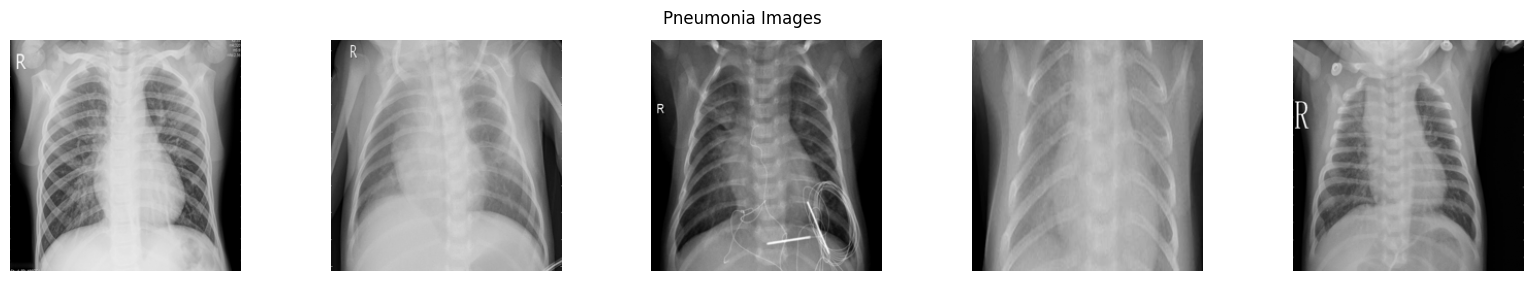

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Define directories
healthy_dir = "chest_xray/train/NORMAL"
pneumonia_dir = "chest_xray/train/PNEUMONIA"

# Create full paths
healthy_files = [os.path.join(healthy_dir, f) for f in os.listdir(healthy_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir)]

def display_images(filepaths, title, num_images=5, img_size=(224, 224)):
    plt.figure(figsize=(20, 3))
    plt.suptitle(title)

    for i in range(num_images):
        img_path = random.choice(filepaths)
        img = Image.open(img_path).resize(img_size)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')  # turn off axis for cleaner look

    plt.show()

# Now it will work without FileNotFoundError
display_images(healthy_files, 'Healthy Images', img_size=(224, 224))
display_images(pneumonia_files, 'Pneumonia Images', img_size=(224, 224))


In [ ]:
train_files, test_files, train_labels, test_labels = train_test_split(filepaths, labels, test_size=0.2, random_state=42)

In [ ]:
print(len(train_files))
print(len(test_files))

5940
1486


In [ ]:
# Split the training data into training and validation sets
train_files, val_files, train_labels, val_labels = train_test_split(
    train_files, train_labels, test_size=0.1, random_state=42
)

In [ ]:
print(len(train_files))
print(len(test_files))
print(len(val_files))

5346
1486
594


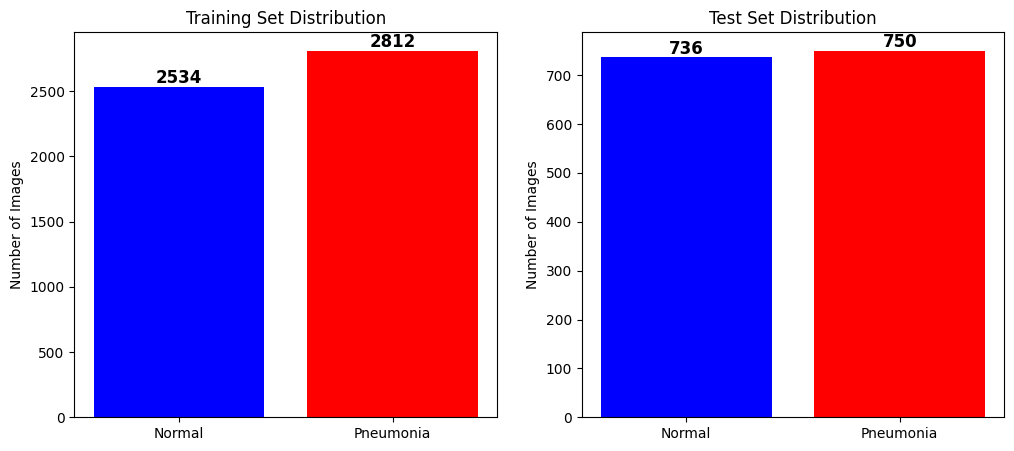

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert labels to NumPy array for easier processing
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Count the occurrences of each class (assuming 0 = Normal, 1 = Pneumonia)
train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)

# Define class names
class_names = ["Normal", "Pneumonia"]

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training set histogram
bars_train = ax[0].bar(class_names, train_counts, color=['blue', 'red'])
ax[0].set_title("Training Set Distribution")
ax[0].set_ylabel("Number of Images")

# Test set histogram
bars_test = ax[1].bar(class_names, test_counts, color=['blue', 'red'])
ax[1].set_title("Test Set Distribution")
ax[1].set_ylabel("Number of Images")

# Add labels on top of the bars
for bar in bars_train:
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')

for bar in bars_test:
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
               ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

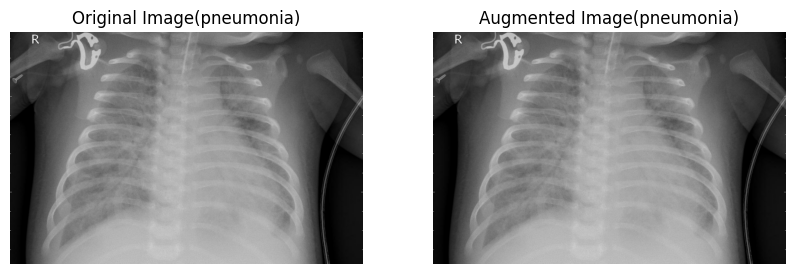

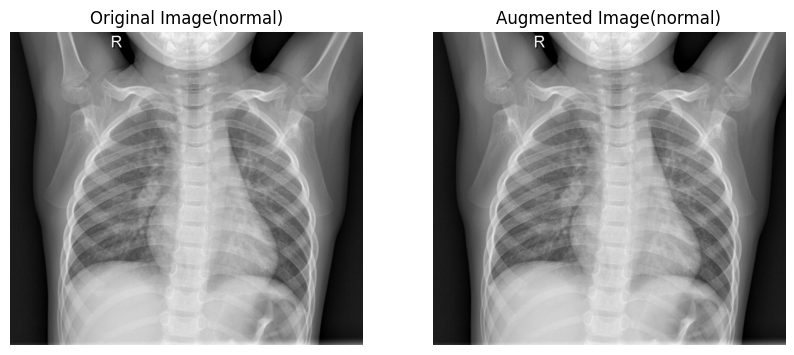

In [ ]:
#Flip horizontal aléatoire
image_path1 = '/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
left_right1 = tf.image.random_flip_left_right(image1)
image_path2 = '/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
left_right2 = tf.image.random_flip_left_right(image2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(pneumonia)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(left_right1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(pneumonia)')
plt.axis('off')

plt.show()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(left_right2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(normal)')
plt.axis('off')

plt.show()

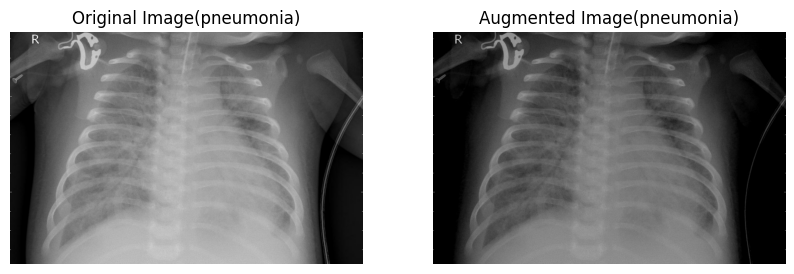

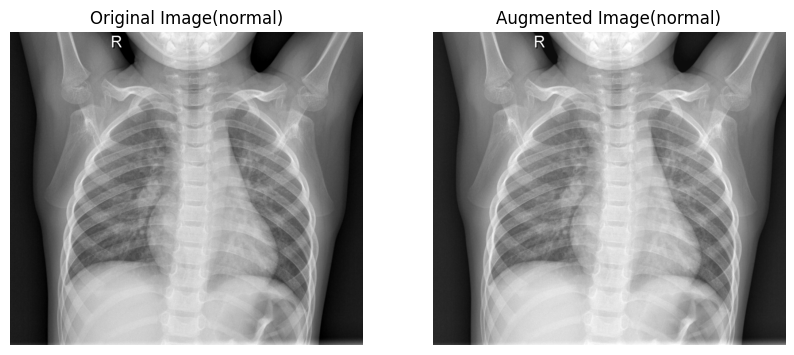

In [ ]:
#Modification de la luminosité
image_path1 = '/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
bright1 = tf.image.random_brightness(image1, max_delta=0.2)
image_path2 = '/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
bright2 = tf.image.random_brightness(image2, max_delta=0.2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(pneumonia)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bright1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(pneumonia)')
plt.axis('off')

plt.show()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bright2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(normal)')
plt.axis('off')

plt.show()

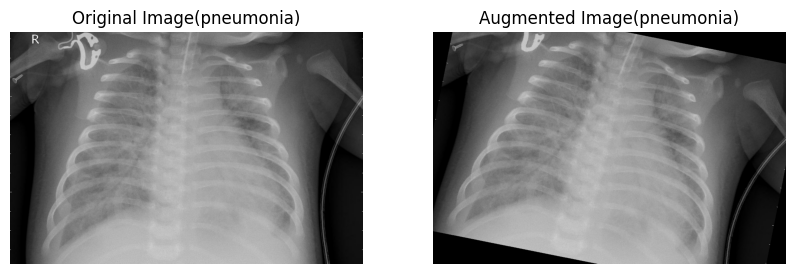

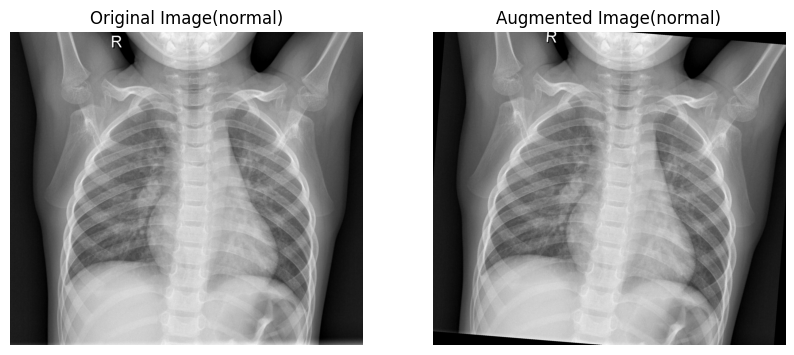

In [ ]:
#rotation
image_path1 = '/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)  # Rotation entre -15° et 15° (en radians)
rot1 = tfa.image.rotate(image1, angles)
image_path2 = '/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)  # Rotation entre -10° et 10° (en radians)
rot2 = tfa.image.rotate(image2, angles)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(pneumonia)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rot1.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(pneumonia)')
plt.axis('off')

plt.show()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rot2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(normal)')
plt.axis('off')

plt.show()

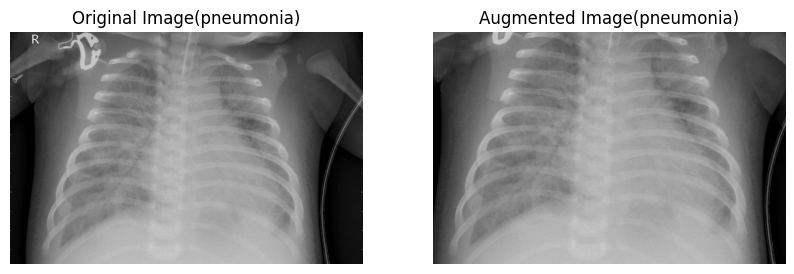

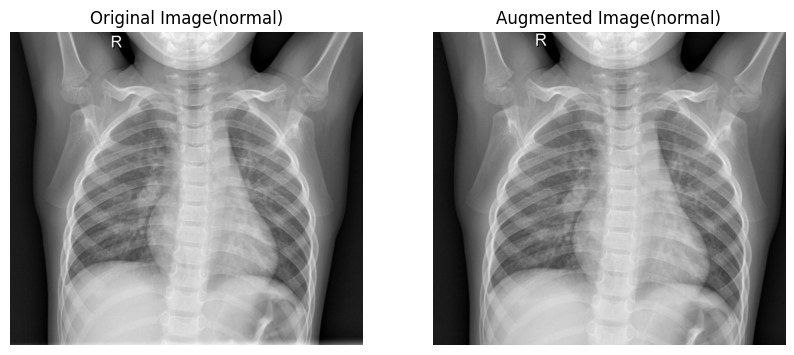

In [ ]:
#zoom
image_path1 = '/content/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
image1 = tf.io.read_file(image_path1)  # Read the image file
image1 = tf.image.decode_jpeg(image1, channels=3)  # Decode the image into a tensor
zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
original_shape = tf.shape(image1)
new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
image11 = tf.image.resize(image1, new_shape)
image12 = tf.image.random_crop(image11, original_shape)
image_path2 = '/content/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
image2 = tf.io.read_file(image_path2)  # Read the image file
image2 = tf.image.decode_jpeg(image2, channels=3)  # Decode the image into a tensor
zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
original_shape = tf.shape(image2)
new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
image22 = tf.image.resize(image2, new_shape)
image13 = tf.image.random_crop(image22, original_shape)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(pneumonia)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image12.numpy().astype(int))  # Display rot1 instead of rot
plt.title('Augmented Image(pneumonia)')
plt.axis('off')

plt.show()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Original Image(normal)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image13.numpy().astype(int))  # Convert to NumPy array and display
plt.title('Augmented Image(normal)')
plt.axis('off')

plt.show()

In [ ]:
def create_dataset(filepaths, labels, batch_size=32, augment=False):
    def load_and_preprocess_image(filepath, label):
        try:
            image = tf.io.read_file(filepath)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, [224, 224])
            image = image / 255.0  # Normalisation
            return image, label
        except tf.errors.InvalidArgumentError:
            # Handle cases where image decoding fails
            print(f"Skipping invalid image file: {filepath.numpy()}")
            return tf.constant([], dtype=tf.float32), tf.constant([], dtype=tf.int32) # Return empty tensors

    dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.filter(lambda image, label: tf.size(image) > 0) # Filter out empty tensors

    if augment:
        def augment_image(image, label):
            angles = tf.random.uniform(shape=[], minval=-0.2, maxval=0.2)
            image = tfa.image.rotate(image, angles)
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, max_delta=0.2)
            # Zoom (20% zoom in)
            zoom_factor = tf.random.uniform(shape=[], minval=1.0, maxval=1.2)
            original_shape = tf.shape(image)
            new_shape = tf.cast(tf.cast(original_shape[:2], tf.float32) * zoom_factor, tf.int32) # Select only height and width
            image = tf.image.resize(image, new_shape)
            image = tf.image.random_crop(image, original_shape)
            image = tf.clip_by_value(image, 0.0, 1.0)
            # Return the image and label, regardless of augmentation
            return image, label
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)


    dataset = dataset.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Créer les datasets
train_dataset = create_dataset(train_files, train_labels, augment=True)
test_dataset = create_dataset(test_files, test_labels)
val_dataset = create_dataset(val_files, val_labels)

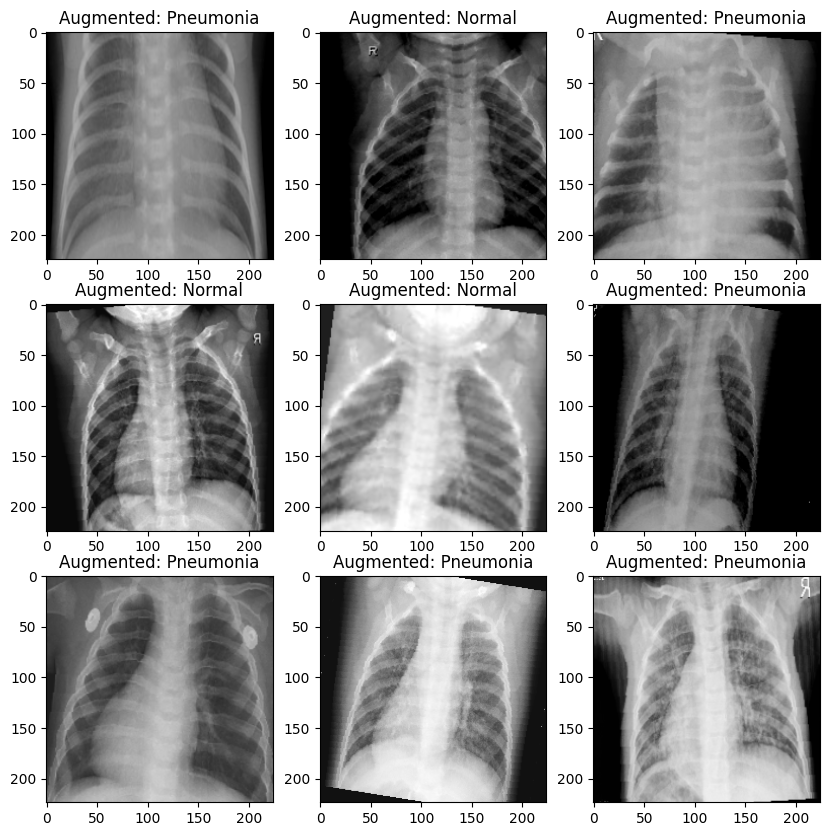

In [ ]:
import matplotlib.pyplot as plt

# Dictionnaire de correspondance des labels pour les deux classes
label_dict = {0: "Normal", 1: "Pneumonia"}

# Prendre un batch d'images du dataset
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):  # Afficher jusqu'à 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Augmented: {label_dict[labels[i].numpy()]}")
        plt.axis("on")
    plt.show()

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Charger le modèle VGG19 pré-entraîné
base_model = VGG19(include_top=False, input_shape=(224,224,3), weights='imagenet')

# Dégeler partiellement (10 dernières couches)
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Ajouter des couches personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # ✅ Fix here

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=predictions)

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,155,969 (76.89 MB)

 Trainable params: 17,830,401 (68.02 MB)

 Non-trainable params: 2,325,568 (8.87 MB)

In [ ]:
for layer in model.layers:
   print(layer, layer.trainable== True)

<InputLayer name=input_layer, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<Conv2D name=block3_conv4, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> True
<Conv2D name=block4_conv2, built=True> True
<Conv2D name=block4_conv3, built=True> True
<Conv2D name=block4_conv4, built=True> True
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<Conv2D name=block5_conv4, built=True> True
<MaxPooling2D name=block5_pool, built=Tru

**Exercice** : Écrivez un code TensorFlow/Keras pour entraîner un modèle CNN (VGG19) sur le jeu de données d’images (train_files et val_dataset) en utilisant des callbacks afin de :

-Arrêter automatiquement l’entraînement lorsque la performance sur les données de validation cesse de s’améliorer.

-Sauvegarder uniquement la version du modèle ayant obtenu la meilleure performance sur la validation.

Instructions :

- Utilisez EarlyStopping pour surveiller la perte de validation (val_loss) et restaurer les meilleurs poids.

- Utilisez ModelCheckpoint pour sauvegarder le meilleur modèle dans un fichier nommé 'best_modelVGG19.keras'.

- Entraînez le modèle sur un maximum de 50 époques avec les callbacks activés.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_modelVGG19.keras', monitor='val_loss', save_best_only=True)

# Training
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/10
    168/Unknown 112s 480ms/step - accuracy: 0.8227 - loss: 0.3633

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


168/168 ━━━━━━━━━━━━━━━━━━━━ 134s 616ms/step - accuracy: 0.8232 - loss: 0.3624 - val_accuracy: 0.9748 - val_loss: 0.0702
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9445 - loss: 0.1368 - val_accuracy: 0.9312 - val_loss: 0.1676
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.9640 - loss: 0.0962 - val_accuracy: 0.9513 - val_loss: 0.1343
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.9717 - loss: 0.0721 - val_accuracy: 0.9228 - val_loss: 0.2184
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9711 - loss: 0.0785 - val_accuracy: 0.9228 - val_loss: 0.2284
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.9715 - loss: 0.0668 - val_accuracy: 0.9480 - val_loss: 0.1433


In [ ]:
#Écrivez le code permettant de recharger un modèle Keras déjà entraîné et sauvegardé.


In [ ]:
import tensorflow as tf

# Recharger le modèle sauvegardé
model = tf.keras.models.load_model("best_modelVGG19.keras")

# Vérifier la structure
model.summary()

# Exemple : évaluer sur le test set
loss, acc = model.evaluate(test_dataset)
print(f"Test accuracy: {acc:.4f}, Test loss: {loss:.4f}")

# Exemple : prédire sur un batch du test set
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    print("Prédictions brutes:", predictions[:5].ravel())
    print("Labels réels:", labels[:5].numpy())


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 55,816,773 (212.92 MB)

 Trainable params: 17,830,401 (68.02 MB)

 Non-trainable params: 2,325,568 (8.87 MB)

 Optimizer params: 35,660,804 (136.04 MB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 375ms/step - accuracy: 0.9725 - loss: 0.0791
Test accuracy: 0.9711, Test loss: 0.0786
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
Prédictions brutes: [0.07384911 0.99981284 0.01609923 0.09401762 0.00311722]
Labels réels: [0 1 0 0 0]


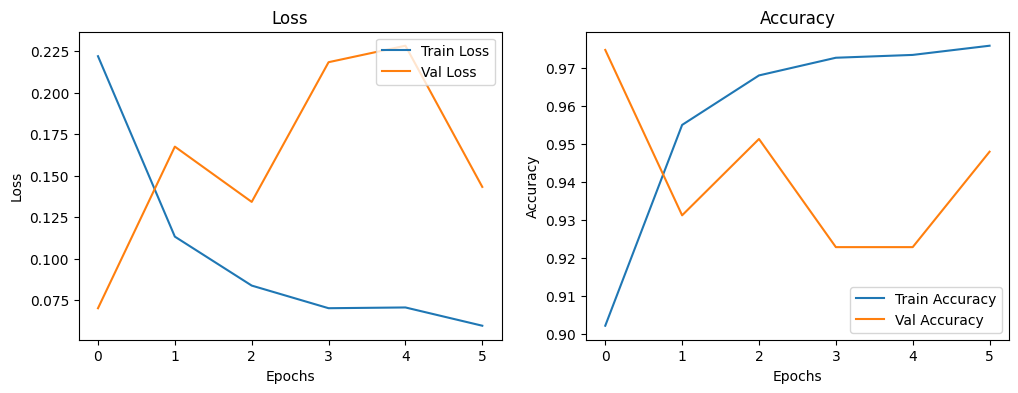

In [ ]:
# Afficher les courbes de loss et d'accuracy
plt.figure(figsize=(12, 4))

# Courbe de loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Récupérer toutes les vraies étiquettes et les prédictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype("int32").flatten()  # seuil 0.5 pour convertir en 0/1
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Rapport de classification (4 chiffres après la virgule)
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Healthy", "Pneumonia"], digits=4))

# Métriques globales
print("=== Global Metrics ===")
print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
print(f"F1-score : {f1_score(y_true, y_pred):.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

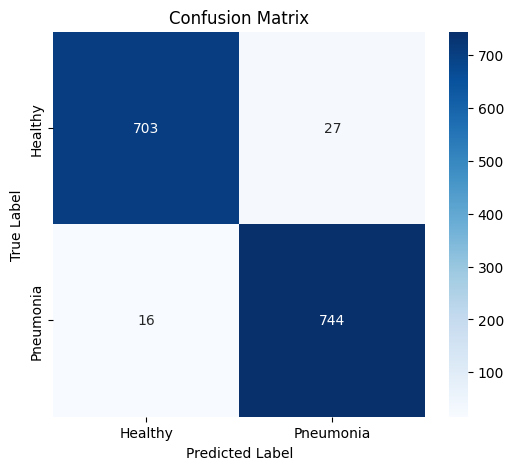

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Afficher la heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Pneumonia"],
            yticklabels=["Healthy", "Pneumonia"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#Exploiter différentes méthodes de XAI -- se référer aux liens Github donnés dans le support de cours

In [ ]:
#Tester d'autres modèles de deep learning ViT, CNN... en utilisant le fine tuning

In [ ]:
# -------------------------
# 1️⃣ Imports
# -------------------------
import os
from PIL import Image
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoImageProcessor, AutoModel
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# -------------------------
# 2️⃣ Dataset Class
# -------------------------
class ImageFolderDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        pixel_values = self.processor(images=image, return_tensors="pt")["pixel_values"].squeeze(0)
        return pixel_values, torch.tensor(label, dtype=torch.float32)



print("Number of training samples:", len(train_files))
print("Number of validation samples:", len(val_files))
print("Number of test samples:", len(test_files))

# -------------------------
# Load ViT and processor
# -------------------------
model_name = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_name)
base_vit = AutoModel.from_pretrained(model_name)

# Freeze base ViT
for param in base_vit.parameters():
    param.requires_grad = False

# -------------------------
# 5️ Custom classifier
# -------------------------
class ViTBinaryClassifier(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        self.classifier = nn.Sequential(
            nn.Linear(base_model.config.hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        outputs = self.base_model(pixel_values=x)
        cls_token = outputs.last_hidden_state[:, 0, :]
        return self.classifier(cls_token).squeeze(-1)

model = ViTBinaryClassifier(base_vit)

# -------------------------
# 6️ DataLoaders
# -------------------------
train_dataset = ImageFolderDataset(train_files, train_labels, processor)
val_dataset = ImageFolderDataset(val_files, val_labels, processor)
test_dataset = ImageFolderDataset(test_files, test_labels, processor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# -------------------------
# 7️ Training setup
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCEWithLogitsLoss()

class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=5)

# -------------------------
# 8️ Training loop
# -------------------------
epochs = 20
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            val_outputs = model(X_val_batch)
            val_loss += criterion(val_outputs, y_val_batch).item()
    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

# -------------------------
# 9️ Evaluation
# -------------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_test_batch, y_test_batch in test_loader:
        X_test_batch = X_test_batch.to(device)
        outputs = model(X_test_batch)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
        y_pred.extend(preds)
        y_true.extend(y_test_batch.numpy())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Number of training samples: 5526
Number of validation samples: 615
Number of test samples: 1536


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20, Val Loss: 0.1628
Epoch 2/20, Val Loss: 0.1321
Epoch 3/20, Val Loss: 0.1047
Epoch 4/20, Val Loss: 0.0950
Epoch 5/20, Val Loss: 0.0991
Epoch 6/20, Val Loss: 0.0830
Epoch 7/20, Val Loss: 0.0828
Epoch 8/20, Val Loss: 0.0761
Epoch 9/20, Val Loss: 0.0876
Epoch 10/20, Val Loss: 0.0932
Epoch 11/20, Val Loss: 0.0707
Epoch 12/20, Val Loss: 0.0732
Epoch 13/20, Val Loss: 0.0732
Epoch 14/20, Val Loss: 0.0640
Epoch 15/20, Val Loss: 0.0605
Epoch 16/20, Val Loss: 0.0636
Epoch 17/20, Val Loss: 0.0635
Epoch 18/20, Val Loss: 0.0583
Epoch 19/20, Val Loss: 0.0572
Epoch 20/20, Val Loss: 0.0540
Confusion Matrix:
[[748  17]
 [ 18 753]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       765
         1.0       0.98      0.98      0.98       771

    accuracy                           0.98      1536
   macro avg       0.98      0.98      0.98      1536
weighted avg       0.98      0.98      0.98      1536



In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5aae7ff83172ed75b45e3cc1c300ecdc768de1cb1f6af22827ebe29c3e143382
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


True label: Negative


  0%|          | 0/1000 [00:00<?, ?it/s]

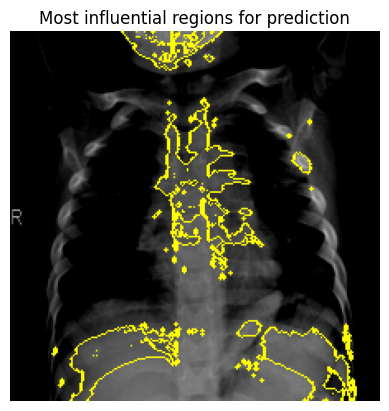

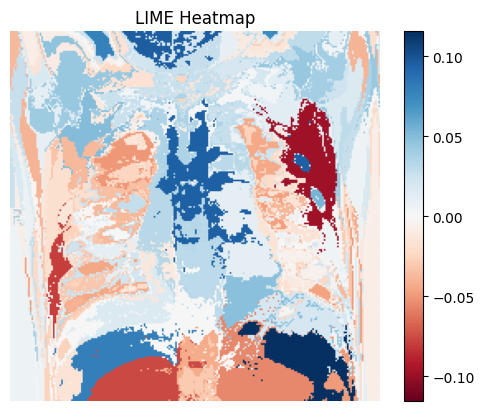

In [ ]:

from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch

# -------------------------
# 2️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    """
    images: numpy array of shape (batch, H, W, C), values 0-255
    returns: numpy array of shape (batch, 2) with probabilities
    """
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float()  # (B, C, H, W)
    batch = batch / 255.0  # scale to 0-1 if needed
    batch = batch.to(device)

    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)

    # Convert sigmoid outputs to two-class softmax-like format
    probs_2class = np.concatenate([1 - probs, probs], axis=1)
    return probs_2class

# -------------------------
# 3️⃣ Select one image from test dataset
# -------------------------
# Use DataLoader
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))
image_np = image[0].permute(1,2,0).numpy() * 255.0  # HWC, 0-255
true_label = true_label[0].item()

print("True label:", "Positive" if true_label==1 else "Negative")

# -------------------------
# 4️⃣ LIME Explanation
# -------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 5️⃣ Show important superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("Most influential regions for prediction")
plt.axis('off')
plt.show()

# -------------------------
# 6️⃣ Heatmap visualization
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis('off')
plt.show()

True label: Positive


  0%|          | 0/1000 [00:00<?, ?it/s]

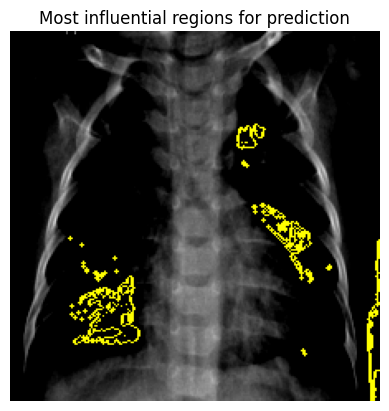

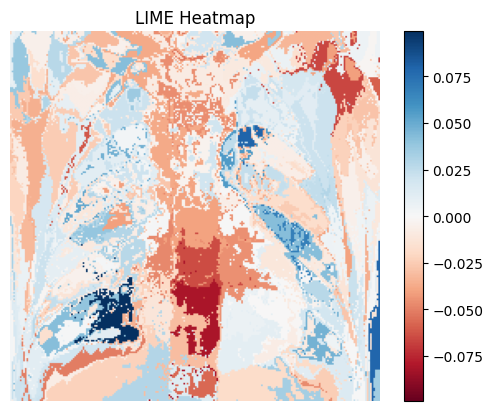

In [ ]:

from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch

# -------------------------
# 2️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    """
    images: numpy array of shape (batch, H, W, C), values 0-255
    returns: numpy array of shape (batch, 2) with probabilities
    """
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float()  # (B, C, H, W)
    batch = batch / 255.0  # scale to 0-1 if needed
    batch = batch.to(device)

    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)

    # Convert sigmoid outputs to two-class softmax-like format
    probs_2class = np.concatenate([1 - probs, probs], axis=1)
    return probs_2class

# -------------------------
# 3️⃣ Select one image from test dataset
# -------------------------
# Use DataLoader
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))
image_np = image[0].permute(1,2,0).numpy() * 255.0  # HWC, 0-255
true_label = true_label[0].item()

print("True label:", "Positive" if true_label==1 else "Negative")

# -------------------------
# 4️⃣ LIME Explanation
# -------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 5️⃣ Show important superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("Most influential regions for prediction")
plt.axis('off')
plt.show()

# -------------------------
# 6️⃣ Heatmap visualization
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis('off')
plt.show()

True label: Negative


  0%|          | 0/1000 [00:00<?, ?it/s]

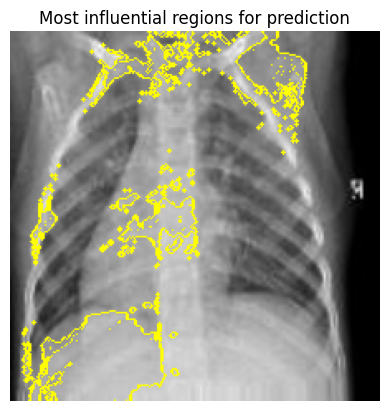

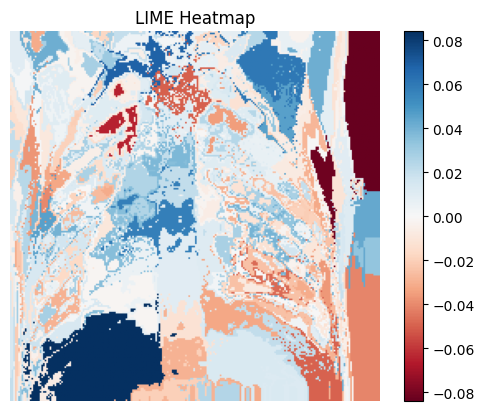

In [ ]:
# -------------------------
# 1️⃣ Imports
# -------------------------
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

# -------------------------
# 2️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    """
    images: numpy array of shape (batch, H, W, C), values 0-255
    returns: numpy array of shape (batch, 2) with probabilities
    """
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float()  # (B, C, H, W)
    batch = batch / 255.0  # scale to 0-1
    batch = batch.to(device)

    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)

    # Convert sigmoid outputs to two-class format
    probs_2class = np.concatenate([1 - probs, probs], axis=1)
    return probs_2class

# -------------------------
# 3️⃣ Select one image from test dataset
# -------------------------
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))

# Convert tensor to numpy image HWC (height, width, channels)
image_np = image[0].permute(1, 2, 0).numpy() * 255.0  # 0-255
true_label = true_label[0].item()

print("True label:", "Positive" if true_label == 1 else "Negative")

# -------------------------
# 4️⃣ LIME Explanation
# -------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 5️⃣ Show important superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Scale image to 0-1 safely for plotting
temp_scaled = (temp - temp.min()) / (temp.max() - temp.min())

plt.imshow(mark_boundaries(temp_scaled, mask))
plt.title("Most influential regions for prediction")
plt.axis('off')
plt.show()

# -------------------------
# 6️⃣ Heatmap visualization
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])

# Map LIME weights to each segment
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis('off')
plt.show()


True label: Negative


  0%|          | 0/1000 [00:00<?, ?it/s]

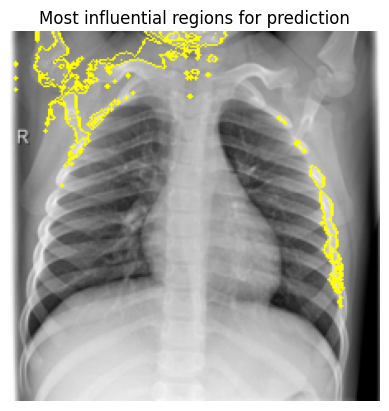

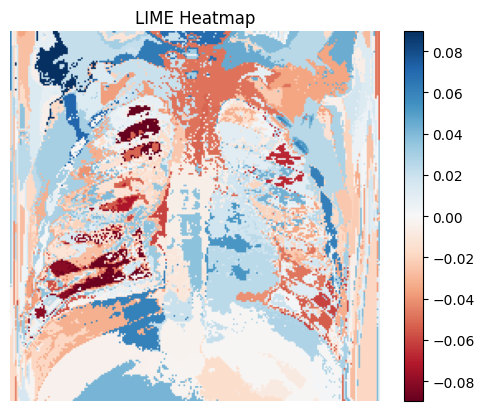

In [ ]:
# -------------------------
# 1️⃣ Imports
# -------------------------
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

# -------------------------
# 2️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    """
    images: numpy array of shape (batch, H, W, C), values 0-255
    returns: numpy array of shape (batch, 2) with probabilities
    """
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float()  # (B, C, H, W)
    batch = batch / 255.0  # scale to 0-1
    batch = batch.to(device)

    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)

    # Convert sigmoid outputs to two-class format
    probs_2class = np.concatenate([1 - probs, probs], axis=1)
    return probs_2class

# -------------------------
# 3️⃣ Select one image from test dataset
# -------------------------
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))

# Convert tensor to numpy image HWC (height, width, channels)
image_np = image[0].permute(1, 2, 0).numpy() * 255.0  # 0-255
true_label = true_label[0].item()

print("True label:", "Positive" if true_label == 1 else "Negative")

# -------------------------
# 4️⃣ LIME Explanation
# -------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 5️⃣ Show important superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Scale image to 0-1 safely for plotting
temp_scaled = (temp - temp.min()) / (temp.max() - temp.min())

plt.imshow(mark_boundaries(temp_scaled, mask))
plt.title("Most influential regions for prediction")
plt.axis('off')
plt.show()

# -------------------------
# 6️⃣ Heatmap visualization
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])

# Map LIME weights to each segment
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis('off')
plt.show()


True label: Positive


  0%|          | 0/1000 [00:00<?, ?it/s]

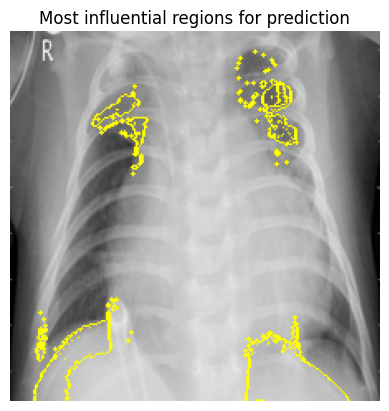

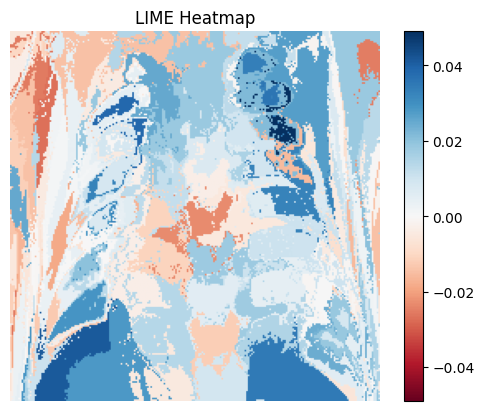

In [ ]:
# -------------------------
# 1️⃣ Imports
# -------------------------
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

# -------------------------
# 2️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    """
    images: numpy array of shape (batch, H, W, C), values 0-255
    returns: numpy array of shape (batch, 2) with probabilities
    """
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float()  # (B, C, H, W)
    batch = batch / 255.0  # scale to 0-1
    batch = batch.to(device)

    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)

    # Convert sigmoid outputs to two-class format
    probs_2class = np.concatenate([1 - probs, probs], axis=1)
    return probs_2class

# -------------------------
# 3️⃣ Select one image from test dataset
# -------------------------
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))

# Convert tensor to numpy image HWC (height, width, channels)
image_np = image[0].permute(1, 2, 0).numpy() * 255.0  # 0-255
true_label = true_label[0].item()

print("True label:", "Positive" if true_label == 1 else "Negative")

# -------------------------
# 4️⃣ LIME Explanation
# -------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 5️⃣ Show important superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Scale image to 0-1 safely for plotting
temp_scaled = (temp - temp.min()) / (temp.max() - temp.min())

plt.imshow(mark_boundaries(temp_scaled, mask))
plt.title("Most influential regions for prediction")
plt.axis('off')
plt.show()

# -------------------------
# 6️⃣ Heatmap visualization
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])

# Map LIME weights to each segment
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis('off')
plt.show()


In [ ]:
#fine tuning

# 1️⃣ Load pretrained ViT
# -------------------------
from transformers import AutoImageProcessor, AutoModel

model_name = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_name)
base_vit = AutoModel.from_pretrained(model_name)

# -------------------------
# 2️⃣ Freeze all layers first
# -------------------------
for param in base_vit.parameters():
    param.requires_grad = False

# -------------------------
# 3️⃣ Unfreeze LAST 2 Transformer encoder blocks
# -------------------------
for name, param in base_vit.named_parameters():
    if "encoder.layer.10" in name or "encoder.layer.11" in name:
        param.requires_grad = True   # allow training

# -------------------------
# 4️⃣ Custom classifier head
# -------------------------
import torch.nn as nn

class ViTBinaryClassifier(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        self.classifier = nn.Sequential(
            nn.Linear(base_model.config.hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        outputs = self.base_model(pixel_values=x)
        cls_token = outputs.last_hidden_state[:, 0, :]  # CLS token
        return self.classifier(cls_token).squeeze(-1)

model = ViTBinaryClassifier(base_vit)

# -------------------------
# 5️⃣ Training setup
# -------------------------
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Two parameter groups → different learning rates
optimizer = torch.optim.Adam([
    {"params": model.base_model.encoder.layer[10].parameters(), "lr": 1e-5},
    {"params": model.base_model.encoder.layer[11].parameters(), "lr": 1e-5},
    {"params": model.classifier.parameters(), "lr": 1e-4}
])

criterion = nn.BCEWithLogitsLoss()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20, Val Loss: 0.1105
Epoch 2/20, Val Loss: 0.0949
Epoch 3/20, Val Loss: 0.0568
Epoch 4/20, Val Loss: 0.0689
Epoch 5/20, Val Loss: 0.0546
Epoch 6/20, Val Loss: 0.0481
Epoch 7/20, Val Loss: 0.0461
Epoch 8/20, Val Loss: 0.0541
Epoch 9/20, Val Loss: 0.0498
Epoch 10/20, Val Loss: 0.0616
Epoch 11/20, Val Loss: 0.0608
Epoch 12/20, Val Loss: 0.0530
Early stopping triggered
✅ Confusion Matrix:
[[720  16]
 [ 11 739]]

✅ Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       736
         1.0       0.98      0.99      0.98       750

    accuracy                           0.98      1486
   macro avg       0.98      0.98      0.98      1486
weighted avg       0.98      0.98      0.98      1486

True label: Healthy


  0%|          | 0/1000 [00:00<?, ?it/s]

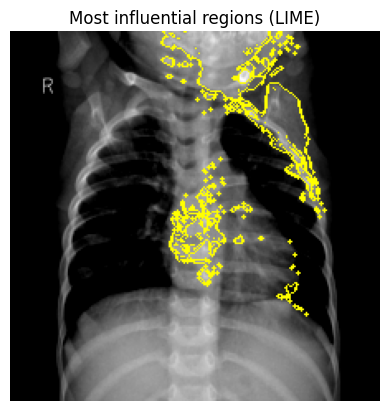

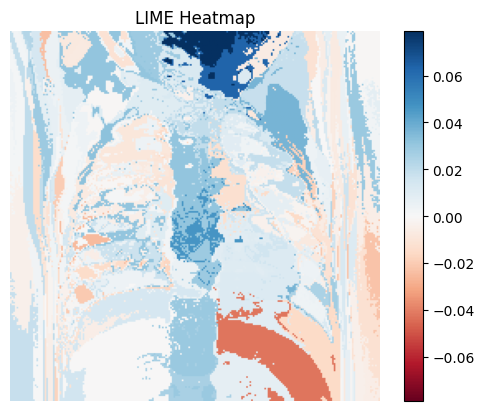

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoImageProcessor, AutoModel
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# 1️⃣ Dataset Class
# -------------------------
class ImageFolderDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        pixel_values = self.processor(images=image, return_tensors="pt")["pixel_values"].squeeze(0)
        return pixel_values, torch.tensor(label, dtype=torch.float32)

# -------------------------
# 2️⃣ Load pretrained ViT
# -------------------------
model_name = "google/vit-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_name)
base_vit = AutoModel.from_pretrained(model_name)

# Freeze all
for param in base_vit.parameters():
    param.requires_grad = False

# Unfreeze last 2 transformer layers for fine-tuning
for name, param in base_vit.named_parameters():
    if "encoder.layer.10" in name or "encoder.layer.11" in name:
        param.requires_grad = True

# -------------------------
# 3️⃣ Custom Classifier
# -------------------------
class ViTBinaryClassifier(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        self.classifier = nn.Sequential(
            nn.Linear(base_model.config.hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        outputs = self.base_model(pixel_values=x)
        cls_token = outputs.last_hidden_state[:, 0, :]  # CLS token
        return self.classifier(cls_token).squeeze(-1)

model = ViTBinaryClassifier(base_vit)

# -------------------------
# 4️⃣ DataLoaders
# -------------------------
train_dataset = ImageFolderDataset(train_files, train_labels, processor)
val_dataset   = ImageFolderDataset(val_files, val_labels, processor)
test_dataset  = ImageFolderDataset(test_files, test_labels, processor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# -------------------------
# 5️⃣ Training setup
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam([
    {"params": model.base_model.encoder.layer[10].parameters(), "lr": 1e-5},
    {"params": model.base_model.encoder.layer[11].parameters(), "lr": 1e-5},
    {"params": model.classifier.parameters(), "lr": 1e-4}
])
criterion = nn.BCEWithLogitsLoss()

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=5)

# -------------------------
# 6️⃣ Training Loop
# -------------------------
epochs = 20
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            val_outputs = model(X_val)
            val_loss += criterion(val_outputs, y_val).item()
    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}")

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

# -------------------------
# 7️⃣ Evaluation
# -------------------------
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        outputs = model(X_test)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
        y_pred.extend(preds)
        y_true.extend(y_test.numpy())

print("✅ Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred))

# -------------------------
# 8️⃣ LIME Explanation
# -------------------------
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Wrapper for LIME
def predict_fn(images):
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0
    batch = batch.to(device)
    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)
    return np.concatenate([1 - probs, probs], axis=1)

# Pick one test sample
test_loader_single = DataLoader(test_dataset, batch_size=1, shuffle=True)
image, true_label = next(iter(test_loader_single))
image_np = image[0].permute(1, 2, 0).numpy() * 255.0
true_label = int(true_label[0].item())
print("True label:", "Pneumonia" if true_label==1 else "Healthy")

# Run LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image_np.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# Show superpixels
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("Most influential regions (LIME)")
plt.axis("off")
plt.show()

# Show heatmap
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap")
plt.axis("off")
plt.show()


True label: Pneumonia


  0%|          | 0/1000 [00:00<?, ?it/s]

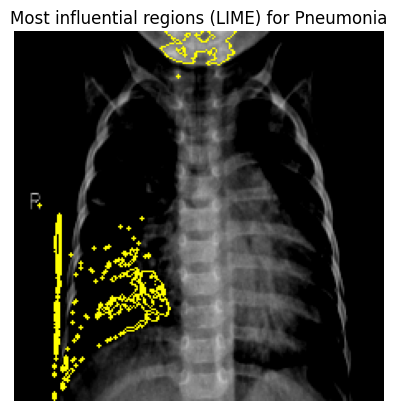

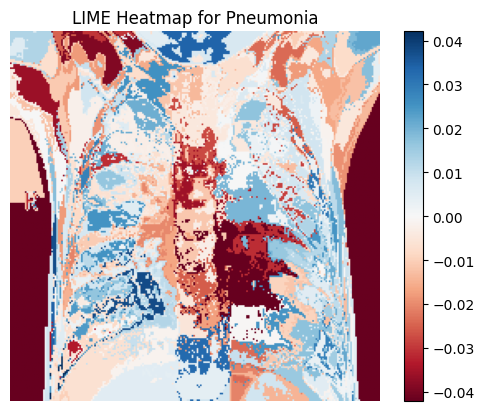

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

# -------------------------
# 1️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0
    batch = batch.to(device)
    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)
    return np.concatenate([1 - probs, probs], axis=1)

# -------------------------
# 2️⃣ Pick a Pneumonia image
# -------------------------
pneumonia_image, pneumonia_label = None, None
for img, lbl in test_dataset:
    if lbl == 1:   # 1 = Pneumonia
        pneumonia_image = img.permute(1, 2, 0).numpy() * 255.0  # HWC format
        pneumonia_label = lbl.item()
        break

print("True label:", "Pneumonia" if pneumonia_label==1 else "Healthy")

# -------------------------
# 3️⃣ Run LIME
# -------------------------
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    pneumonia_image.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 4️⃣ Show superpixels
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("Most influential regions (LIME) for Pneumonia")
plt.axis("off")
plt.show()

# -------------------------
# 5️⃣ Show heatmap
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap for Pneumonia")
plt.axis("off")
plt.show()


True label: Pneumonia


  0%|          | 0/1000 [00:00<?, ?it/s]

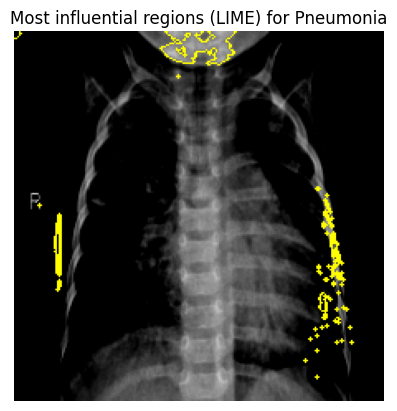

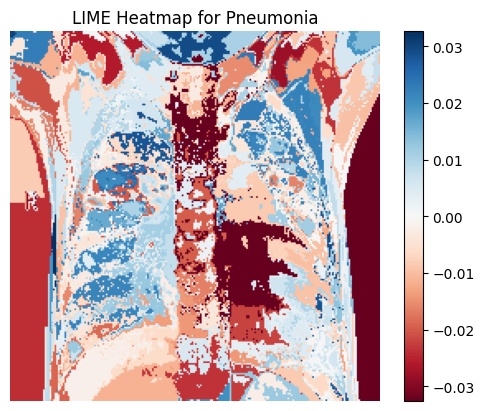

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from lime import lime_image
from skimage.segmentation import mark_boundaries

# -------------------------
# 1️⃣ Wrapper for LIME
# -------------------------
def predict_fn(images):
    model.eval()
    images = np.array(images)
    batch = torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0
    batch = batch.to(device)
    with torch.no_grad():
        outputs = model(batch)
        probs = torch.sigmoid(outputs).cpu().numpy().reshape(-1, 1)
    # Return [Healthy, Pneumonia] probabilities
    return np.concatenate([1 - probs, probs], axis=1)

# -------------------------
# 2️⃣ Pick a Pneumonia image from test dataset
# -------------------------
pneumonia_image, pneumonia_label = None, None
for img, lbl in test_dataset:
    if lbl == 1:   # 1 = Pneumonia
        pneumonia_image = img.permute(1, 2, 0).numpy() * 255.0  # Convert tensor → numpy (HWC)
        pneumonia_label = lbl.item()
        break

print("True label:", "Pneumonia" if pneumonia_label == 1 else "Healthy")

# -------------------------
# 3️⃣ Run LIME
# -------------------------
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    pneumonia_image.astype('double'),
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000
)

# -------------------------
# 4️⃣ Show superpixels (with clipping fix)
# -------------------------
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Clip values to [0,1] for matplotlib
temp_scaled = np.clip(temp / 255.0, 0, 1)

plt.imshow(mark_boundaries(temp_scaled, mask))
plt.title("Most influential regions (LIME) for Pneumonia")
plt.axis("off")
plt.show()

# -------------------------
# 5️⃣ Show heatmap
# -------------------------
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Heatmap for Pneumonia")
plt.axis("off")
plt.show()
